In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.0f}'.format

## Gross By Studio

In [2]:
df = pd.read_csv('data/studio_gross.csv', float_precision=1)

In [3]:
df.head()

,studio,domestic_gross,foreign_gross,total_gross
0,BV,"415,000,000","652,000,000","1,067,000,000"
1,BV,"334,200,000","691,300,000","1,025,500,000"
2,WB,"296,000,000","664,300,000","960,300,000"
3,WB,"292,600,000","535,700,000","828,300,000"
4,P/DW,"238,700,000","513,900,000","752,600,000"


In [4]:
top10 = df.studio.value_counts().head(10)

In [5]:
top10

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

In [6]:
type(top10)

pandas.core.series.Series

### Sum the totals for each studio

In [7]:
df.groupby(['studio']).sum()

,domestic_gross,foreign_gross,total_gross
studio,,,
3D,"6,100,000","9,900,000","16,000,000"
A23,"164,200",0,"164,200"
A24,"324,194,200","238,462,200","562,656,400"
ADC,"248,200",0,"248,200"
AF,"2,142,900","3,500,000","5,642,900"
...,...,...,...
XL,"458,000",0,"458,000"
YFG,"1,100,000",0,"1,100,000"
Yash,"31,631,400","272,825,100","304,392,100"


### Sort and aggregate the data for the top 10 studios

In [8]:
df_agg = df.groupby(['studio']).agg('sum')

In [9]:
df_agg = df_agg.sort_values('total_gross', ascending=False).head(10)

In [10]:
df_agg.index

Index(['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S',
       'P/DW'],
      dtype='object', name='studio')

#### Change the font size for the plot so that it is legible in the presentation

In [11]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

### Stacked Bar plot for top 10 studios' gross revenue, split foreign and domestic

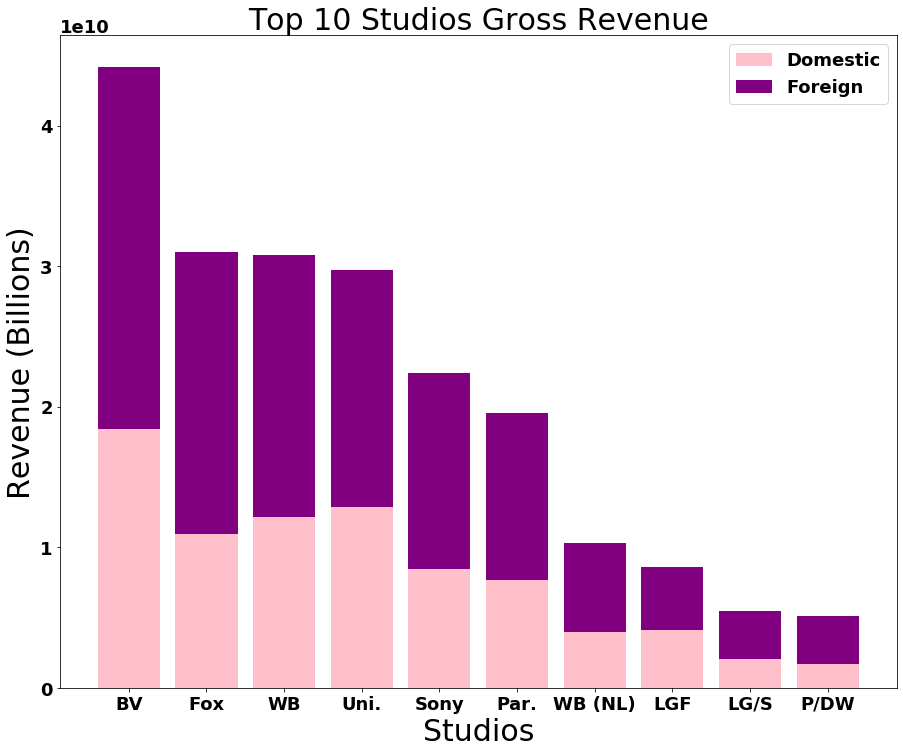

In [12]:
plt.figure(figsize=(15,12))

studios = df_agg.index
dom_gross = df_agg.domestic_gross
for_gross = df_agg.foreign_gross
tot_gross = df_agg.total_gross

plt.bar(range(len(studios)), dom_gross, color='pink')
plt.bar(range(len(studios)), for_gross, color='purple', bottom=dom_gross)
plt.title('Top 10 Studios Gross Revenue', fontsize=30)
plt.xlabel('Studios', fontsize=30)
plt.ylabel('Revenue (Billions)', fontsize=30)
plt.xticks(range(len(studios)), studios)

plt.legend(['Domestic', 'Foreign'])
plt.show();

***

## Analysis of genres

In [13]:
df_ititlebas = pd.read_csv('data/imdb.title.basics.csv')

In [14]:
df_ititlebas.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"


In [15]:
df_bom_profit = pd.read_csv('data/boxoffice_profit.csv')

In [16]:
df_bom_profit.head(5)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [17]:
df_ititlebas.drop(columns=['runtime_minutes', 'tconst'], inplace=True)

In [18]:
df_ititlebas.head()

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [19]:
filt = df_ititlebas['genres'].str.contains('Drama', na=False)

In [20]:
df_ititlebas.loc[filt]

,primary_title,original_title,start_year,genres
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...
146124,The Holden Family Plan,The Holden Family Plan,2019,"Drama,Family"
146132,The Last White Witch,The Last White Witch,2019,"Comedy,Drama,Fantasy"
146135,The Rehearsal,O Ensaio,2019,Drama
146137,Safeguard,Safeguard,2019,"Drama,Thriller"


In [21]:
df_ititlebas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
primary_title     146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
genres            140736 non-null object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [22]:
df_bom_profit.set_index('movie', inplace=True)

In [23]:
df_bom_profit.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
movie,,,,,,,,,
Avatar,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True
Pirates of the Caribbean: On Stranger Tides,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True
Dark Phoenix,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False
Avengers: Age of Ultron,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True
Star Wars Ep. VIII: The Last Jedi,4,5,"Dec 15, 2017",317000000,620181382,1316721747,696540365,999721747,True


In [24]:
merge_inner = pd.merge(left=df_bom_profit,right=df_ititlebas, left_on='movie', right_on='primary_title')

In [25]:
merge_inner.head()

,Unnamed: 0,id,release_date,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit,primary_title,original_title,start_year,genres
0,0,1,"Dec 18, 2009",425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Abatâ,2011,Horror
1,1,2,"May 20, 2011",410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy"
2,2,3,"Jun 7, 2019",350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,Dark Phoenix,2019,"Action,Adventure,Sci-Fi"
3,3,4,"May 1, 2015",330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi"
4,6,7,"Apr 27, 2018",300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"


In [26]:
merge_inner.drop(columns='start_year', inplace=True)

In [27]:
merge_inner.drop(columns='release_date', inplace=True)

In [28]:
merge_inner.drop(columns='Unnamed: 0', inplace=True)

In [29]:
merge_inner.drop(columns='original_title', inplace=True)

In [30]:
merge_inner.head()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit,primary_title,genres
0,1,425000000,760507625,2776345279,2015837654,2351345279,True,Avatar,Horror
1,2,410600000,241063875,1045663875,804600000,635063875,True,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,3,350000000,42762350,149762350,107000000,-200237650,False,Dark Phoenix,"Action,Adventure,Sci-Fi"
3,4,330600000,459005868,1403013963,944008095,1072413963,True,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
4,7,300000000,678815482,2048134200,1369318718,1748134200,True,Avengers: Infinity War,"Action,Adventure,Sci-Fi"


In [31]:
profit_counts = []

In [32]:
filt = (merge_inner['genres'].str.contains('Drama', na=False)) & (merge_inner['profit'] == True)

In [33]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [34]:
filt = (merge_inner['genres'].str.contains('Action', na=False)) & (merge_inner['profit'] == True)

In [35]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [36]:
filt = (merge_inner['genres'].str.contains('Documentary', na=False)) & (merge_inner['profit'] == True)

In [37]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [38]:
filt = (merge_inner['genres'].str.contains('Adventure', na=False)) & (merge_inner['profit'] == True)

In [39]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [40]:
filt = (merge_inner['genres'].str.contains('Sci-Fi', na=False)) & (merge_inner['profit'] == True)

In [41]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [42]:
filt = (merge_inner['genres'].str.contains('Comedy', na=False)) & (merge_inner['profit'] == True)

In [43]:
profit_counts.append(len(merge_inner.loc[filt].index))

In [44]:
loss_counts = []

In [45]:
filt = (merge_inner['genres'].str.contains('Drama', na=False)) & (merge_inner['profit'] == False)

In [46]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [47]:
filt = (merge_inner['genres'].str.contains('Action', na=False)) & (merge_inner['profit'] == False)

In [48]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [49]:
filt = (merge_inner['genres'].str.contains('Documentary', na=False)) & (merge_inner['profit'] == False)

In [50]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [51]:
filt = (merge_inner['genres'].str.contains('Adventure', na=False)) & (merge_inner['profit'] == False)

In [52]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [53]:
filt = (merge_inner['genres'].str.contains('Sci-Fi', na=False)) & (merge_inner['profit'] == False)

In [54]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [55]:
filt = (merge_inner['genres'].str.contains('Comedy', na=False)) & (merge_inner['profit'] == False)

In [56]:
loss_counts.append(len(merge_inner.loc[filt].index))

In [57]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

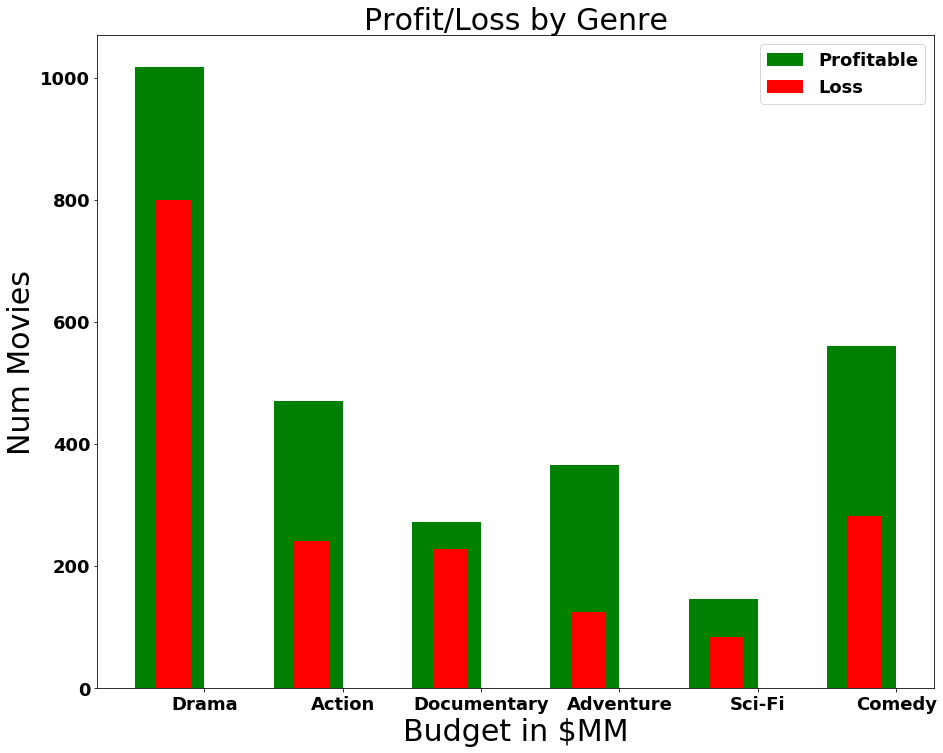

In [58]:
index_counts = ['Drama', 'Action', 'Documentary', 'Adventure', 'Sci-Fi', 'Comedy']
width = .5
plt.figure(figsize=(15,12))
indices = np.arange(len(index_counts))

plt.bar(indices, profit_counts, width=width, 
        color='g', label='Profitable')
plt.bar([i+.05*width for i in indices], loss_counts, 
        width=0.5*width, color='red', alpha=1, label='Loss')
plt.xticks(indices+width/2., index_counts)
plt.ylabel('Num Movies', fontsize=30)
plt.title('Profit/Loss by Genre', fontsize=30)
plt.xlabel('Budget in $MM', fontsize=30)
plt.legend()
plt.show();


***

## Budget Ranges Analysis

In [59]:
counts_pos = []

In [60]:
counts_neg = []

In [61]:
df = pd.read_csv('data/boxoffice_profit.csv')

In [62]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


### Profitable Counts

In [63]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] < 10000000)].index))

In [64]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [65]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [66]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [67]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [68]:
counts_pos.append(len(df[(df['profit'] == True) &  (df['production_budget'] >= 20000000)].index))

In [69]:
counts_pos

[1059, 777, 1086, 626, 330, 1968]

### Not Profitable Counts

In [70]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] < 10000000)].index))

In [71]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 10000000) & (df['production_budget'] <= 20000000)].index))

In [72]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000) & (df['production_budget'] <= 50000000)].index))

In [73]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 50000000) & (df['production_budget'] <= 100000000)].index))

In [74]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 100000000) & (df['production_budget'] <= 200000000)].index))

In [75]:
counts_neg.append(len(df[(df['profit'] == False) &  (df['production_budget'] >= 20000000)].index))

In [76]:
counts_neg = np.asarray(counts_neg)

In [77]:
labels = ['<10','<20','<50','<100','<200','>200']

In [78]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

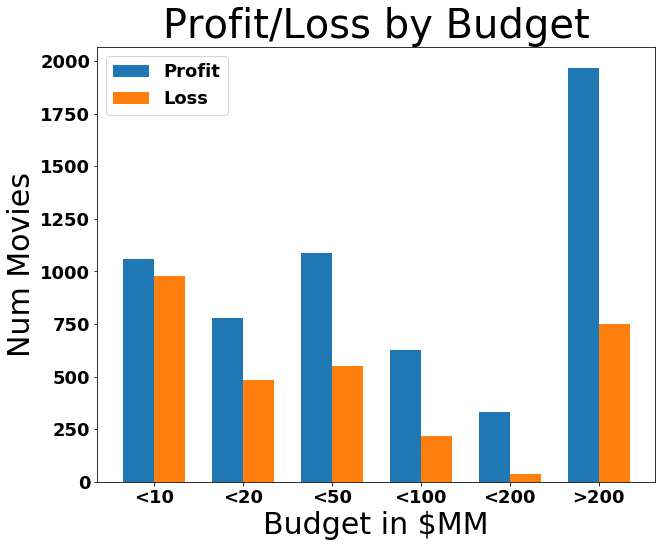

In [79]:
N = 6
plt.figure(figsize=(10,8))
ind = np.arange(N) 
width = 0.35     

plt.bar(ind, counts_pos, width, label='Profit')
plt.bar(ind + width, counts_neg, width, label='Loss')
plt.ylabel('Num Movies', fontsize=30)
plt.title('Profit/Loss by Budget', fontsize=40)
plt.xlabel('Budget in $MM', fontsize=30)
plt.xticks(ind + width / 2, (labels))
plt.legend(loc='best')

plt.show();

***

## Losses Categorized by Domestic Only, Foreign Only, and Unreleased

In [80]:
df_rt_budget = pd.read_csv('data/tn.movie_budgets_working.csv') # utf-8 is default

In [81]:
df_rt_budget.columns

Index(['Unnamed: 0', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'foreign_gross', 'PnL'],
      dtype='object')

In [82]:
df_rt_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
Unnamed: 0           5782 non-null int64
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
foreign_gross        5782 non-null int64
PnL                  5782 non-null int64
dtypes: int64(7), object(2)
memory usage: 406.7+ KB


In [83]:
df_rt_budget.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [84]:
df = df_rt_budget

In [85]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [86]:
df['profit'] = df['PnL'] > 0

In [87]:
df['profit'].value_counts()

True     3657
False    2125
Name: profit, dtype: int64

In [88]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


### Drop Index Column

In [89]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Save the data set to an external file

In [90]:
# DO NOT RERUN !!!!!!!!!!!!!
#df.to_csv('data/boxoffice_profit.csv')

In [91]:
df_bo_pnl = pd.read_csv('data/boxoffice_profit.csv')

In [92]:
df_bo_pnl.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [93]:
df_bo_pnl.profit.value_counts()

True     3657
False    2125
Name: profit, dtype: int64

In [94]:
df_bo_pnl[(df_bo_pnl['foreign_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
341,341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0,-106900000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
505,505,6,"Nov 22, 2000",102 Dalmatians,85000000,66941559,66941559,0,-18058441,False
...,...,...,...,...,...,...,...,...,...,...
5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0,-6100,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,False
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,False


In [95]:
df_bo_pnl[(df_bo_pnl['domestic_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
617,617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,60680125,-16919875,False
...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,False
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,False
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False


In [96]:
df_bo_pnl[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
670,670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,0,-75000000,False
...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,False
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,False
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False


In [97]:
df_bo_pnl_un_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] == 0) & (~df_bo_pnl['profit'])]

In [98]:
df_bo_pnl_un_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
670,670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,0,-75000000,False


In [99]:
df_bo_pnl_notfor_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] != 0) & (df_bo_pnl['foreign_gross'] == 0) & (~df_bo_pnl['profit'])]

In [100]:
df_bo_pnl_notfor_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
341,341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0,-106900000,False
505,505,6,"Nov 22, 2000",102 Dalmatians,85000000,66941559,66941559,0,-18058441,False
515,515,16,"Nov 13, 1998",Meet Joe Black,85000000,44650003,44650003,0,-40349997,False
584,584,85,"Dec 25, 1998",Mighty Joe Young,80000000,50632037,50632037,0,-29367963,False
659,659,60,"Dec 17, 1999",Anna and the King,75000000,39251128,39251128,0,-35748872,False


### Check the data so that it makes sense

In [101]:
df_bo_pnl_notfor_agg.PnL.sum()

-6741494633

In [102]:
df_bo_pnl_notdom_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] != 0) & (~df_bo_pnl['profit'])]

In [103]:
df_bo_pnl_notdom_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
617,617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,60680125,-16919875,False
619,619,20,"Jan 22, 2019",Renegades,77500000,0,1521672,1521672,-75978328,False
820,820,21,"Oct 26, 2018",Air Strike,65000000,0,516279,516279,-64483721,False
1325,1325,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,73706,-44926294,False
1368,1368,69,"Dec 31, 2015",Pourquoi j'ai pas mangÃ© mon pÃ¨re,42000000,0,15451663,15451663,-26548337,False


In [104]:
losses = [(df_bo_pnl_notdom_agg.PnL.sum()), (df_bo_pnl_notfor_agg.PnL.sum()), (df_bo_pnl_un_agg.PnL.sum())]

In [105]:
losses

[-1317770255, -6741494633, -2277558580]

In [106]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

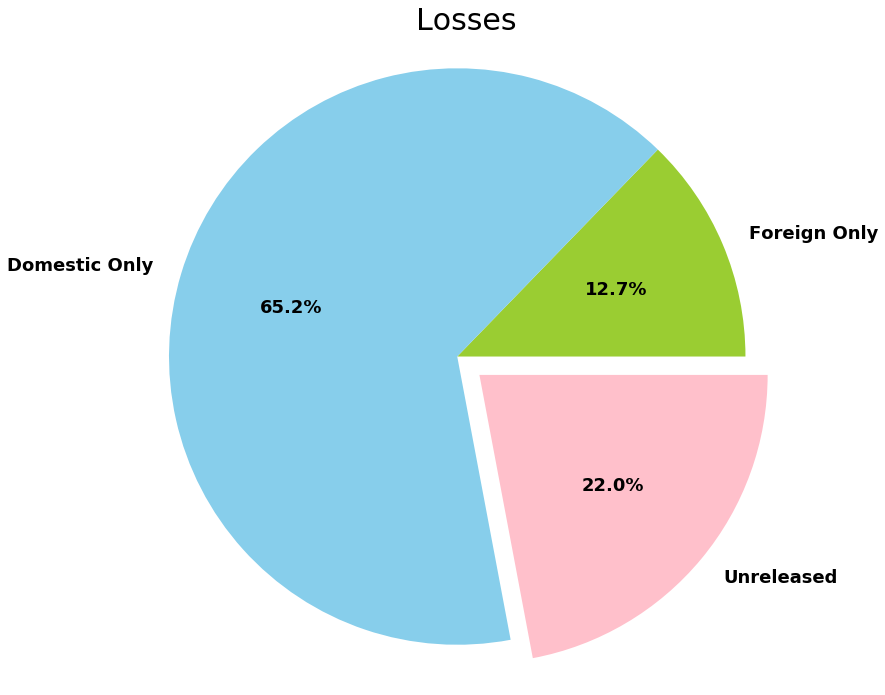

In [107]:

categories = ['Foreign Only', 'Domestic Only', 'Unreleased']
losses = [abs(df_bo_pnl_notdom_agg.PnL.sum()), abs(df_bo_pnl_notfor_agg.PnL.sum()), abs(df_bo_pnl_un_agg.PnL.sum())]
colors = ['yellowgreen', 'skyblue', 'pink']
explode = (0, 0, 0.1)

plt.figure(figsize=(15,12))
plt.pie(losses, explode=explode, labels=categories, autopct='%1.1f%%', colors=colors, shadow=False)

plt.axis('scaled')
plt.title('Losses', fontsize=30)


plt.show();